In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from seaborn
df = sns.load_dataset('iris')

# Display the first few rows to understand the dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
# Calculate the mean for each species
means = df.groupby('species').mean()
print("\nMeans of the variables for each species:\n", means)


Means of the variables for each species:
             sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [3]:
# T-test for comparing 'sepal_length' between two species
# We will compare 'setosa' and 'versicolor'
setosa = df[df['species'] == 'setosa']['sepal_length']
versicolor = df[df['species'] == 'versicolor']['sepal_length']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print("\nT-test between Setosa and Versicolor:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-test between Setosa and Versicolor:
T-statistic: -10.52098626754911, P-value: 8.985235037487077e-18



ANOVA test across all species for Sepal Length:
F-statistic: 119.26450218450468, P-value: 1.6696691907693826e-31


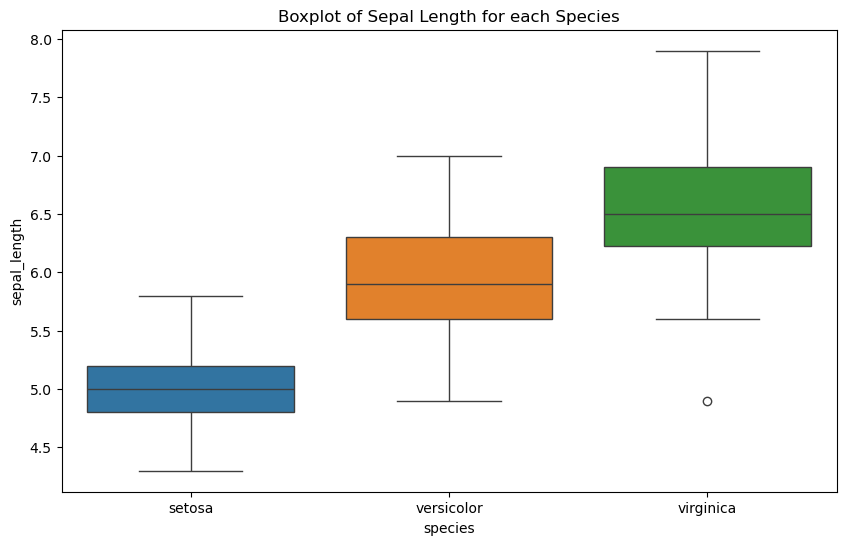

In [7]:
# Conduct an ANOVA for comparing the 'sepal_length' across all species
# ANOVA test checks if there are any statistically significant differences between the means of the groups
f_stat, p_value_anova = stats.f_oneway(df[df['species'] == 'setosa']['sepal_length'],
                                       df[df['species'] == 'versicolor']['sepal_length'],
                                       df[df['species'] == 'virginica']['sepal_length'])

print("\nANOVA test across all species for Sepal Length:")
print(f"F-statistic: {f_stat}, P-value: {p_value_anova}")

# Visualize the distribution of Sepal Length for each species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=df, hue='species')
plt.title("Boxplot of Sepal Length for each Species")
plt.show()